# Geospatial Analysis Project 2

You are given the following spatial datasets with ‘WGS_1984_UTM_Zone_45N’ 
Projection for Ward 31, Khulna City Corporation.

 a. Ward_31_KCC                     
 b. Mouza_Ward31                       
 c. Proposed_Road_Ward31      
 e. Existing_Road
 f. Ward_boundary_KCC
 d. Existing_Structure

❑Find out the total number of structures based on structure type within 1 m 
 distance from the proposed road.

❑Find out the affected plots with ownership information within 1 m distance from 
 the proposed roa

## SOLUTION

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read(



✅ Structure counts within 1 meter of the proposed road:

STR_TYPE
Semipucca    50
Katcha       48
Pucca        29
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_20060\2324826604.py:38: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\HP\AppData\Local\Temp\ipykernel_20060\2324826604.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


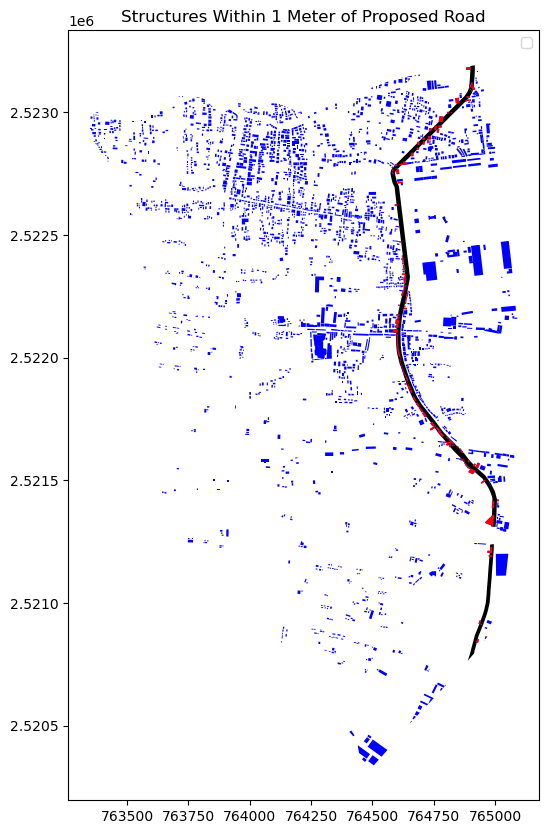

In [2]:
import geopandas as gpd
from shapely.ops import unary_union
import matplotlib.pyplot as plt

# Step 1: Load relevant data from the GDB
gdb_path = r"E:\GIS_File\Project\Geo-project\2nd\Road Improvement.gdb\Road Improvement.gdb\Road Improvement.gdb"  # Change to actual path

# Load layers
structures = gpd.read_file(gdb_path, layer="Existing_Structure")
proposed_road = gpd.read_file(gdb_path, layer="Proposed_Road_Ward31")

# Step 2: Reproject to UTM Zone 45N (WGS 1984)
target_crs = "EPSG:32645"
structures = structures.to_crs(target_crs)
proposed_road = proposed_road.to_crs(target_crs)

# Step 3: Create 1 meter buffer around proposed road
buffer_1m = proposed_road.buffer(1)
road_buffer_union = unary_union(buffer_1m)

# Step 4: Identify structures within 1 meter
structures['within_1m'] = structures.geometry.intersects(road_buffer_union)
near_structures = structures[structures['within_1m']]

# Step 5: Count by structure type
structure_type_col = 'STR_TYPE'  # Change if different
structure_counts = near_structures[structure_type_col].value_counts()

print("\n✅ Structure counts within 1 meter of the proposed road:\n")
print(structure_counts)

# Step 6: Optional plot
fig, ax = plt.subplots(figsize=(10, 10))
proposed_road.plot(ax=ax, color='black', linewidth=2, label='Proposed Road')
structures.plot(ax=ax, color='blue', markersize=10, label='All Structures')
near_structures.plot(ax=ax, color='red', markersize=20, label='Structures <1m')

plt.legend()
plt.title("Structures Within 1 Meter of Proposed Road")
plt.show()
